<a href="https://colab.research.google.com/github/saad1ibn2akhter/AI_Olympiad_problems_and_solutions/blob/main/calorie_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression , Ridge
from sklearn.metrics import  r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , PolynomialFeatures



In [141]:
df = pd.read_csv('calories.csv')
print(df.columns)
print(df.head(5))
print(df.info())
print("Avg. calories consumption",df['Calories'].mean())

Index(['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Gender', 'Calories'],
      dtype='object')
    User_ID  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Gender  \
0  14498311   79     165      73        13          79       40.0    male   
1  16700865   28     148      48         6          91       39.4  female   
2  17197650   27     187      82        25         101       40.8    male   
3  16400540   40     173      71        16          93       40.4    male   
4  15539631   40     183      90         5          80       39.0    male   

   Calories  
0        54  
1        28  
2       128  
3        69  
4        14  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     9000 non-null   int64  
 1   Age         9000 non-null   int64  
 2   Height      9000 non-null   int64  
 3   W

In [142]:
X = df[['Age','Height','Weight','Duration','Heart_Rate' , 'Body_Temp']]
# X = df[['Duration','Heart_Rate' , 'Body_Temp']]
Y = df[['Calories']]
lr = LinearRegression()
lr.fit(X,Y)
yhat = lr.predict(X)
# print(yhat)

model = Ridge(alpha=0.1)
model.fit(X,Y)
yhat_2 = model.predict(X)


R2 = r2_score( Y,yhat )
R_2 = r2_score( Y,yhat_2 )
print("R^2 : " ,R2)
print("R^2 (Ridge) : " ,R_2)
scale = StandardScaler()

poly = PolynomialFeatures(degree =2)
x_poly = poly.fit_transform(X, Y)
lr.fit(x_poly,Y)
yhatx = lr.predict(x_poly)
print(yhatx)
print("R^2 : ", r2_score(Y,yhatx))



R^2 :  0.9670016084538713
R^2 (Ridge) :  0.9670016083652659
[[ 53.93690025]
 [ 33.95556265]
 [132.68502562]
 ...
 [159.0320305 ]
 [ 20.90145454]
 [ 25.09300421]]
R^2 :  0.9948311238766722


In [143]:
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size=0.2 ,random_state=1)


In [144]:
sample = len(df)
no_males = len(df[df['Gender'] == 'male'])
avg_duration = float(df['Duration'].mean())
oldSeniorUsers = len(df[df['Age'] >= 75])

answers = [
    str(sample),
    str(no_males),
    f"{avg_duration:.2f}",
    str(oldSeniorUsers)
]
task1_df = pd.DataFrame({
    'subtaskID': [1, 2, 3,4],
    'datapointID': [1, 1, 1,1],
    # 'answer': [sample, no_males, avg_duration,oldSeniorUsers]
    'answer':answers
})
task1_df.to_csv('output.csv', index=False)

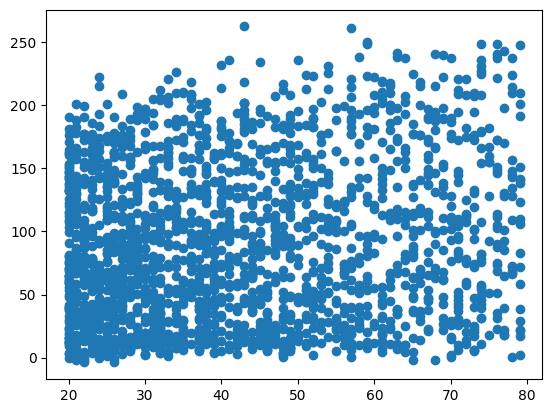

In [145]:
test_df = pd.read_csv('calories_test.csv')

task5df = test_df[test_df['Subtask']==5]
x_pred = task5df[['Age','Height','Weight','Duration','Heart_Rate' , 'Body_Temp']]
# x_pred = task5df[['Duration','Heart_Rate' , 'Body_Temp']]
x_poly_trans = poly.fit_transform(x_pred)

yhat2 = lr.predict(x_poly_trans).flatten()
# Yhat =model.predict(x_pred).flatten()

# cant use r^2 , so visualize it
plt.scatter(test_df[test_df['Subtask'] == 5]['Age'],yhat2)
plt.show()

submission_df = pd.DataFrame({
     'subtaskID': 5,
    'datapointID': task5df['User_ID'],
    'answer': yhat2
})
submission_df.to_csv('output.csv', index=False , mode='a' ,header=False )



In [146]:
#subtask 6

test_df2 = pd.read_csv('calories_test.csv')

task6df = test_df2[test_df2['Subtask']==6]
x_pred2 = task6df[['Age','Height','Weight','Duration','Heart_Rate' , 'Body_Temp']]
# x_pred2 = task6df[['Duration','Heart_Rate' , 'Body_Temp']]
x_poly_shit = poly.fit_transform(x_pred2)
yhat3 = lr.predict(x_poly_shit).flatten()
Yhat3 = model.predict(x_pred2).flatten()

submission_df2 = pd.DataFrame({
     'subtaskID': 6,
    'datapointID': task6df['User_ID'],
    'answer': yhat3
})
submission_df2.to_csv('output.csv', index=False,mode='a', header=False)


<Axes: xlabel='Weight', ylabel='Calories'>

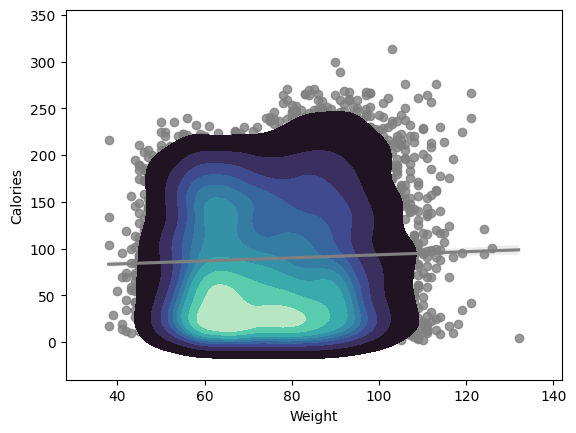

In [147]:
#visualization
sns.regplot(x=df['Weight'],y=Y , data = df,color='grey')
sns.kdeplot(data=df, x='Weight', y='Calories', fill=True, cmap='mako', thresh=0.05)


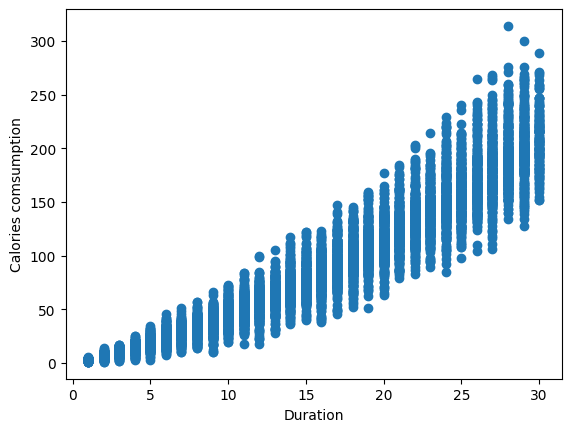

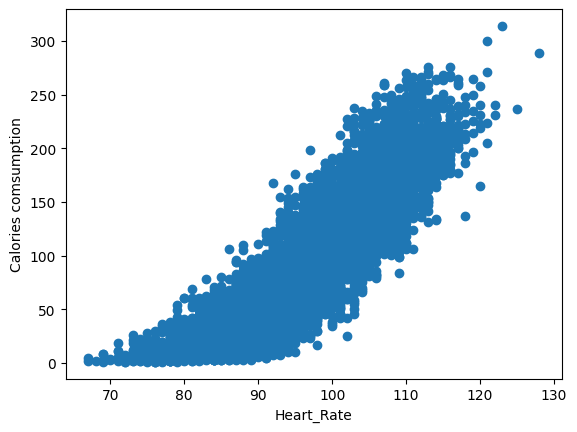

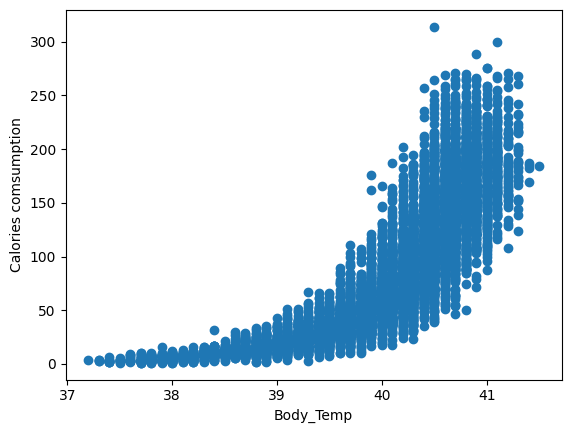

delta :   114
[[ 53.93690025]
 [ 33.95556265]
 [132.68502562]
 ...
 [159.0320305 ]
 [ 20.90145454]
 [ 25.09300421]]
R^2 :  0.9948311238766722


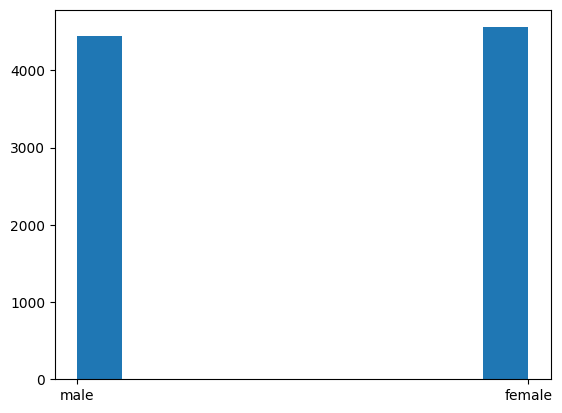

In [148]:
#checking the effect of every independant variables separately
# data_str = ['Age','Height','Weight','Duration','Heart_Rate' , 'Body_Temp']
data_str = ['Duration','Heart_Rate' , 'Body_Temp']
for i in data_str:
  plt.scatter(df[i] , df['Calories'])
  plt.xlabel(f"{i}")
  plt.ylabel("Calories comsumption")
  plt.show()
#gender
plt.hist(df['Gender'] )
delta = np.abs(len(df[df['Gender'] =='male']) -  len(df[df['Gender'] =='female']))
print("delta :  ", delta)

#observation is
#height + weight has similar linearity ->
#lets remove this 2
#age can be removed as well

#2nd order polynomial regression might be a good fit


scale = StandardScaler()

poly = PolynomialFeatures(degree =2)
x_poly = poly.fit_transform(X, Y)
lr.fit(x_poly,Y)
yhatx = lr.predict(x_poly)
print(yhatx)
print("R^2 : ", r2_score(Y,yhatx))


